In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/Users/ghanishtaggarwal/Desktop/BA/musk_csv.csv')

In [4]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
df.shape

(6598, 170)

In [6]:
df['molecule_name'].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
MUSK-306            2
NON-MUSK-308        2
MUSK-300            2
NON-MUSK-j96        1
NON-MUSK-j97        1
Name: molecule_name, Length: 102, dtype: int64

In [7]:
df['conformation_name'].value_counts()

249_1+3       1
f146_1+272    1
288_4+50      1
f146_1+211    1
f146_1+8      1
             ..
197_1+277     1
217_1+35      1
252_1+76      1
288_2+27      1
270_1+55      1
Name: conformation_name, Length: 6598, dtype: int64

In [8]:
df['ID'].value_counts()

2047    1
1322    1
5392    1
1298    1
3347    1
       ..
4687    1
2644    1
597     1
4695    1
2049    1
Name: ID, Length: 6598, dtype: int64

In [9]:
missing_df=pd.DataFrame()
missing_df['cols']=df.isnull().sum().keys()
missing_df['values']=df.isnull().sum().values.tolist()
missing_df[missing_df['values']>0]

,cols,values


In [15]:
df1=df.drop(['conformation_name','ID','molecule_name','class'],axis=1)

In [16]:
#Scaling is performed
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
scaler = preprocessing.RobustScaler()
scaled = scaler.fit_transform(df1)

In [17]:
scaled=pd.DataFrame(scaled,columns=df1.columns)

In [18]:
scaled.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.1250,0.418367,0.330508,-0.392857,0.0,0.156863,0.050926,-1.232877,0.163265,0.337469,...,-0.888889,-0.385417,0.712062,0.177215,-0.134731,0.327586,-0.714286,0.434783,0.644068,0.539062
1,-0.1875,-0.397959,-0.389831,0.419643,0.0,-0.382353,0.138889,-1.301370,0.005102,-0.704715,...,0.111111,0.911458,0.501946,0.924051,0.248503,0.500000,-0.448980,-0.043478,0.237288,0.406250
2,0.1250,-0.459184,-0.389831,0.473214,0.0,0.392157,0.138889,-1.280822,0.005102,0.069479,...,-0.222222,0.520833,-0.089494,0.987342,0.488024,0.603448,-0.530612,-0.304348,0.084746,0.093750
3,-0.1875,-0.397959,-0.389831,0.419643,0.0,-0.392157,0.138889,-1.294521,0.005102,-0.694789,...,0.000000,0.906250,0.494163,0.924051,0.254491,0.500000,-0.469388,0.000000,0.254237,0.414062
4,-0.1875,-0.397959,-0.389831,0.419643,0.0,-0.392157,0.138889,-1.294521,0.005102,-0.694789,...,0.000000,0.906250,0.494163,0.924051,0.254491,0.517241,-0.469388,0.000000,0.254237,0.414062


In [19]:
scaled['class']=df['class']
target_col=['class']

In [20]:
# Correlation matri is formed
corr_matrix=df.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.75)]

In [21]:
to_drop

['f7',
 'f9',
 'f14',
 'f15',
 'f17',
 'f19',
 'f22',
 'f23',
 'f26',
 'f30',
 'f34',
 'f35',
 'f39',
 'f40',
 'f41',
 'f43',
 'f44',
 'f45',
 'f46',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f57',
 'f59',
 'f60',
 'f61',
 'f62',
 'f64',
 'f65',
 'f66',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f85',
 'f86',
 'f87',
 'f89',
 'f90',
 'f91',
 'f93',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f117',
 'f118',
 'f119',
 'f120',
 'f121',
 'f122',
 'f123',
 'f125',
 'f127',
 'f128',
 'f129',
 'f130',
 'f133',
 'f134',
 'f135',
 'f136',
 'f137',
 'f139',
 'f140',
 'f141',
 'f142',
 'f143',
 'f144',
 'f148',
 'f149',
 'f150',
 'f151',
 'f152',
 'f153',
 'f154',
 'f155',
 'f156',
 'f159',
 'f162']

In [22]:
scaled=scaled.drop(to_drop,axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold

#splitting train and test
train, test = train_test_split(scaled, test_size=0.2, random_state=17)
train_X = train.drop('class', axis=1)
train_Y = train['class']
test_X = test.drop('class', axis=1)
test_Y = test['class']

In [28]:
# Importing the Keras libraries and packages 
import keras 
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [43]:
clf_=Sequential()

In [44]:
clf_.add(Dense(units = 10, kernel_initializer = 'uniform', 
activation = 'relu', input_dim = 62))

In [45]:
clf_.add(Dense(units = 6, kernel_initializer = 'uniform', 
activation = 'relu'))

In [46]:
clf_.add(Dense(units = 1, kernel_initializer = 'uniform', 
activation = 'sigmoid'))

In [47]:
# Compiling Neural Network 
clf_.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
history=clf_.fit(train_X,train_Y,validation_split=0.2, batch_size = 10, epochs = 50)

Train on 4222 samples, validate on 1056 samples
Epoch 1/50
4222/4222 [==============================] - 1s 208us/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0078 - val_accuracy: 0.9981
Epoch 2/50
4222/4222 [==============================] - 1s 207us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9981
Epoch 3/50
4222/4222 [==============================] - 1s 182us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 4/50
4222/4222 [==============================] - 1s 191us/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 5/50
4222/4222 [==============================] - 1s 225us/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 6/50
4222/4222 [==============================] - 1s 203us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0066 - val_accuracy: 0.9972
Epoch 7/50
4222/4222 [==============================] - 1s 206us/step - loss

In [71]:
_,accuracy = clf_.evaluate(train_X,train_Y)
print('Accuracy: %.2f' % (accuracy*100))

5278/5278 [==============================] - 0s 32us/step
Accuracy: 99.36


In [72]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


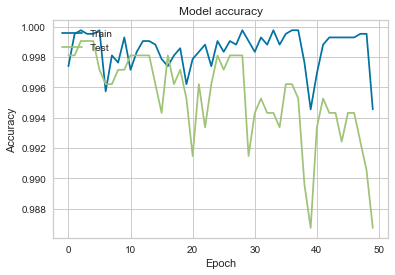

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

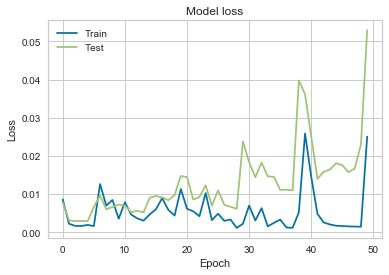

In [75]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [88]:
y_pred = clf_.predict(test_X, batch_size=10, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_Y, y_pred_bool))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1111
           1       0.00      0.00      0.00       209

    accuracy                           0.84      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.71      0.84      0.77      1320



In [89]:
confusion_matrix=confusion_matrix(test_Y,y_pred_bool)
print(confusion_matrix)

[[1111    0]
 [ 209    0]]
